In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES'] = ''
filename = ["record_data/train-00000-of-01024"]
dataset = tf.data.TFRecordDataset(filename)

def __parse_record(proto):
    features = {
      'image/height': tf.FixedLenFeature([1], dtype=tf.int64,
                                              default_value=-1),
      'image/width': tf.FixedLenFeature([1], dtype=tf.int64,
                                              default_value=-1),
      'image/colorspace': tf.FixedLenFeature([], dtype=tf.string,
                                          default_value=''),
      'image/channels': tf.FixedLenFeature([1], dtype=tf.int64,
                                              default_value=-1),
      'image/class/label': tf.FixedLenFeature([1], dtype=tf.int64,
                                              default_value=-1),
      'image/class/synset': tf.FixedLenFeature([], dtype=tf.string,
                                          default_value=''),
      'image/class/text': tf.FixedLenFeature([], dtype=tf.string,
                                          default_value=''),
#       'image/object/bbox/label': tf.FixedLenFeature([1], dtype=tf.int64,
#                                               default_value=-1),
      'image/format': tf.FixedLenFeature([], dtype=tf.string,
                                          default_value=''),
      'image/filename': tf.FixedLenFeature([], dtype=tf.string,
                                          default_value=''),
      'image/encoded': tf.FixedLenFeature([], dtype=tf.string,
                                          default_value='')}
#     sparse_float32 = tf.VarLenFeature(dtype=tf.float32)
#     features.update(
#       {k: sparse_float32 for k in ['image/object/bbox/xmin',
#                                    'image/object/bbox/ymin',
#                                    'image/object/bbox/xmax',
#                                    'image/object/bbox/ymax']})
    parsed_features = tf.parse_single_example(proto, features)
    
    return parsed_features

dataset = dataset.map(__parse_record)
iterator = dataset.make_one_shot_iterator()

W0310 08:20:53.246520 139929355309184 deprecation.py:323] From <ipython-input-1-b8a4e3b428b8>:45: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


height: 375
width: 500
colorspace: RGB
channel: 3
label: 394
synset: n02607072
text: anemone fish
format: JPEG
name: n02607072_5718.JPEG


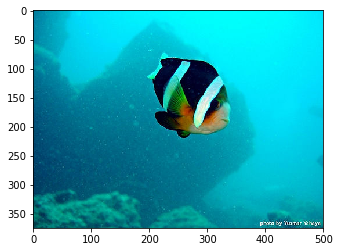

In [2]:
with tf.Session() as sess:
    feature = sess.run(iterator.get_next())
    
    height = feature['image/height'][0]
    width = feature['image/width'][0]
    print('height:', height)
    print('width:', width)

    colorspace = feature['image/colorspace'].decode()
    print('colorspace:', colorspace)
    
    channel = feature['image/channels'][0]
    print('channel:', channel)
    
    label = feature['image/class/label'][0]
    print('label:', label)
    
    synset = feature['image/class/synset'].decode()
    print('synset:', synset)
    
    text = feature['image/class/text'].decode()
    print('text:', text)
    
#     bbox_label = feature['image/object/bbox/label'][0]
#     print('bbox:', bbox_label)
    
#     xmin = tf.expand_dims(feature['image/object/bbox/xmin'].values, 0)
#     ymin = tf.expand_dims(feature['image/object/bbox/ymin'].values, 0)
#     xmax = tf.expand_dims(feature['image/object/bbox/xmax'].values, 0)
#     ymax = tf.expand_dims(feature['image/object/bbox/ymax'].values, 0)
#     xmin, xmax, ymin, ymax = sess.run([xmin, xmax, ymin, ymax])
#     print((xmax-xmin)*height)
#     print((ymax-ymin)*width)
    
    form = feature['image/format'].decode()
    print('format:', form)
    
    name = feature['image/filename']
    name = name.decode()
    print('name:', name)
    
    img_data = feature['image/encoded']
    
    img_data = sess.run(tf.image.decode_jpeg(img_data))
    
    image = np.frombuffer(img_data, np.uint8)
    image = np.reshape(image, [height, width, 3])
    
    plt.figure()
    plt.imshow(img_data)
    plt.show()
    